**Import Dependencies**

In [6]:
pip install emnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import argmax
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt
from PIL import Image
from emnist import list_datasets
from emnist import extract_training_samples, extract_test_samples



 **Emnist Digit Dataset**

In [12]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [14]:
images, labels = extract_training_samples('digits')
images.shape

(240000, 28, 28)

**Data Loading and Preprocessing**

In [15]:
# load train and test dataset of emnist dataset
def load_dataset():
 trainX, trainY = extract_training_samples('digits')
 testX, testY = extract_test_samples('digits')
 # reshape dataset to have a single channel as for grayscale image
 trainX = trainX.reshape(-1, 28, 28, 1).astype('float32') / 255.0
 testX = testX.reshape(-1, 28, 28, 1).astype('float32') / 255.0
  #  target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY


**Load pre trained model**

In [16]:
trained_model = load_model('my_trained_model.h5')


In [17]:
#add layers to trained model
x = Flatten()(trained_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

In [18]:
# Create the transfer learning model
transfer_model = Model(inputs=trained_model.input, outputs=output)

In [19]:
# Freeze pre-trained model layer
for layer in trained_model.layers:
    layer.trainable = False

In [20]:
# Compile the model
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Model Training and Evaluation**

In [21]:
def check_accuracy():
  trainX, trainY, testX, testY = load_dataset()
  transfer_model.fit(trainX, trainY, batch_size=64, epochs=5, validation_data=(testX, testY))
  loss, acc = transfer_model.evaluate(testX, testY, verbose=1)

  #Check Loss and Accuracy
  print('Test Loss: %.3f' % loss)
  print('Test Accuracy: %.3f' % (acc * 100.0))

 
check_accuracy()
     

Epoch 1/5
3750/3750 [==============================] - 121s 32ms/step - loss: 0.2185 - accuracy: 0.9506 - val_loss: 0.1700 - val_accuracy: 0.9575
Epoch 2/5
3750/3750 [==============================] - 126s 34ms/step - loss: 0.1635 - accuracy: 0.9596 - val_loss: 0.1552 - val_accuracy: 0.9624
Epoch 3/5
3750/3750 [==============================] - 114s 30ms/step - loss: 0.1496 - accuracy: 0.9627 - val_loss: 0.1420 - val_accuracy: 0.9643
Epoch 4/5
3750/3750 [==============================] - 114s 30ms/step - loss: 0.1396 - accuracy: 0.9646 - val_loss: 0.1373 - val_accuracy: 0.9652
Epoch 5/5
1250/1250 [==============================] - 19s 15ms/step - loss: 0.1281 - accuracy: 0.9664
Test Loss: 0.128
Test Accuracy: 96.635


**Input Image**

In [22]:
def load_image(filename):
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel as for grayscale image
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img

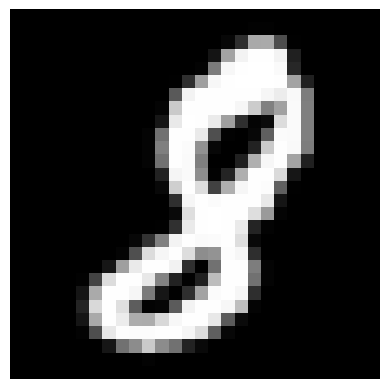

In [23]:
# show the emnist image for test purpose as I have downloaded in my machine
image = Image.open('emnist_8.png')
image.show()

**Prediction**

In [24]:
# load an image and predict the label of image
def run_example():
 img = load_image('emnist_8.png')
#  load model
 predict_value = transfer_model.predict(img)
 digit = argmax(predict_value)
 print(digit)
 
run_example()

/usr/local/lib/python3.9/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 154ms/step
8


*Hence our pretrained model's weights over mnist digit dataset perform transfer learning very well over new emnist digit*